In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Read the Excel file
df = pd.read_excel('Breast Surgery-Assiut University1.xlsx')

#Confirm the Data
df.head()


,name,age,site of mass,lymph nodes,pathological type,molecular type,pre NACT mass size,post NACT mass size,radiological mass resopse,radiological LN resopse,breast surgical tecenique,axilla management,pathological respose,excised mass size,margines distance,pathlogical mass resopse,pathological LN resopse,post operative early complication,recurrence
0,محروسه عبدالحميد,55,UOQ,Postive,IDC,luminal B,4×3,disappeared,complete response,negative LN,lateral mammoplasty,sentinel LN biopsy,T1(.5cm),3×2.5,1 cm,good response,negative LN,no complication,no
1,سناء جبره,52,LOQ,Postive,IDC,luminal A,6×4,4×3,partial resopnse,negative LN,superior pedicle mammoplasty,sentinel LN biopsy,T 1(1 cm),5×4,1.5 cm,good response,negative LN,partial areola necosis,no
2,فاطمه احمد,42,UOQ,Postive,IDC,luminal B,4×3,disappeared,complete response,negative LN,lateral mammoplasty,sentinel LN biopsy,T1 (.5cm),3×2.5,1 cm,good response,negative LN,no complication,no
3,صفاء فرغلي,45,supraareolar,Postive,IDC,luminal A,3.5 × 3 cm,1×1 cm,good response,negative LN,batwing mamoplasty,sentinel LN biopsy,T1(.5cm),4×3.5,1.5 cm,good response,negative LN,no complication,no
4,رانيا سيد,37,UOQ,Postive,IDC,luminal A,3.5 × 2.5 cm,1.5×1.5,good response,negative LN,lateral mammoplasty,axillary dissection,T2 (2.2 cm),5×4,1 cm,partial response,postive LN,no complication,no


In [26]:
#Data Cleaning

#Check Any missed Data
missing_before = df.isnull().sum()

#Delete Any missed Data
df_cleaned = df.dropna()

#Check Data after 
missing_after = df_cleaned.isnull().sum()

#Compare Before and After
comparison = pd.DataFrame({
'Before': missing_before,    
    'After ': missing_after
})

# Results
print("📊 Comparison of Date before and after Data cleaning:")
print(comparison)


📊 Comparison of Date before and after Data cleaning:
                                    Before  After 
name                                     0       0
age                                      0       0
site of mass                             0       0
lymph nodes                              0       0
pathological type                        0       0
molecular type                          14       0
pre NACT mass size                       0       0
post NACT mass size                      0       0
radiological mass resopse                0       0
radiological LN resopse                  0       0
breast surgical tecenique                0       0
axilla management                        0       0
pathological respose                    16       0
excised mass size                       13       0
margines distance                       16       0
pathlogical mass resopse                 0       0
pathological LN resopse                  0       0
post operative early complica

In [35]:
#Data Cleaning

#Delete any duplicated Data
print (df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [109]:
#Standardize columns names
df.columns = df.columns.str.strip().str.lower()


#print columns names
print(df.columns)

Index(['name', 'age', 'site of mass', 'lymph nodes', 'pathological type',
       'molecular type', 'pre nact mass size', 'post nact mass size',
       'radiological mass resopse', 'radiological ln resopse',
       'breast surgical tecenique', 'axilla management',
       'pathological respose', 'excised mass size', 'margines distance',
       'pathlogical mass resopse', 'pathological ln resopse',
       'post operative early complication', 'recurrence'],
      dtype='object')


In [49]:
#Data Cleaning

# Standardize text values in the ALL columns by deleting spaces and converting to lowercase
df["site_of_mass"] = df["site_of_mass"].str.strip().str.lower()
df["lymph_nodes"] = df["lymph_nodes"].str.strip().str.lower()
df["pathological_type"] = df["pathological_type"].str.strip().str.lower()
df["molecular_type"] = df["molecular_type"].str.strip().str.lower()
df["molecular_type"] = df["molecular_type"].str.strip().str.lower()
df["radiological_mass_resopse"] = df["radiological_mass_resopse"].str.strip().str.lower()
df["radiological_ln_resopse"] = df["radiological_ln_resopse"].str.strip().str.lower()
df["breast_surgical_tecenique"] = df["breast_surgical_tecenique"].str.strip().str.lower()
df["axilla_management"] = df["axilla_management"].str.strip().str.lower()
df["pathlogical_mass_resopse"] = df["pathlogical_mass_resopse"].str.strip().str.lower()
df["pathlogical_mass_resopse"] = df["pathlogical_mass_resopse"].str.strip().str.lower()
df["pathological_ln_resopse"] = df["pathological_ln_resopse"].str.strip().str.lower()
df["recurrence"] = df["recurrence"].str.strip().str.lower()
df["post_operative_early_complication"] = df["post_operative_early_complication"].str.strip().str.lower()


In [86]:
#Age Analysis 

age_col = "age"
under_45 = df[df[age_col] < 45].shape[0]
above_or_equal_45 = df[df[age_col] >= 45].shape[0]
average_age = df[age_col].mean()
min_age = df[age_col].min()
max_age = df[age_col].max()

#Print Results
print("📊  Age analysis:")
print(f"Patients <45 : {under_45}")
print(f"Patients >= 45: {above_or_equal_45} ")
print(f"Average Age: {average_age:.0f} ")
print(f"Min : {min_age} ")
print(f"Max: {max_age} ")


📊  Age analysis:
Patients <45 : 27
Patients >= 45: 17 
Average Age: 45 
Min : 28 
Max: 60 


    Age group  Num. of pts
0    Below 45           27
1  Above/= 45           17


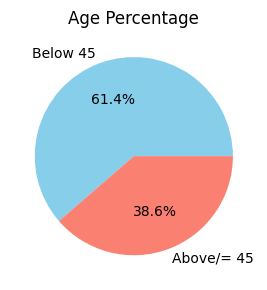

In [101]:
#TABLE FOR AGE ANALYSIS
summary_df = pd.DataFrame({
    "Age group": ["Below 45",  "Above/= 45"],
    "Num. of pts": [under_45,   above_or_equal_45] })
print(summary_df)

#PIE CHART FOR AGE ANALYSIS
plt.figure(figsize=(3, 3))
plt.pie(summary_df["Num. of pts"], labels=summary_df["Age group"], autopct="%1.1f%%", colors=["skyblue", "salmon"])
plt.title("Age Percentage")
plt.tight_layout()
plt.show()


UOQ              19
UIQ               9
supraareolar      5
LOQ               3
LIQ               2
retroareolar      2
ILQ               2
LQ                1
LLQ               1
Name: site of mass, dtype: int64


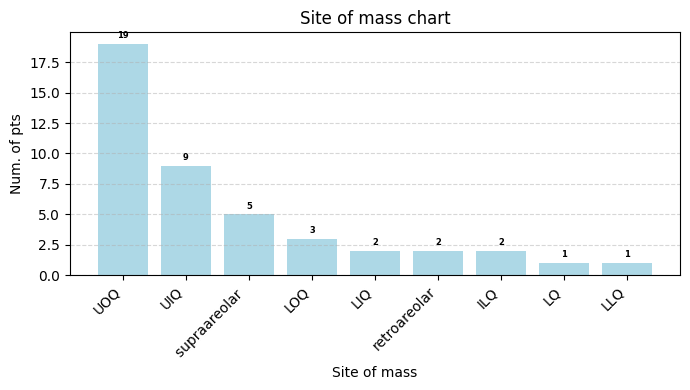

In [174]:
#site of mass Analysis

site_of_mass_counts = df["site of mass"].value_counts()
print(site_of_mass_counts)


#CONVERT DATA TO TABLE
site_df = site_of_mass_counts.reset_index()
site_df.columns = ["Site of mass", "Num. of pts"]

#COLUMN CHART FOR SITE OF MASS
plt.figure(figsize=(7, 4))
plt.bar(site_df["Site of mass"], site_df["Num. of pts"], color="lightblue")

#ROTATE NAME OF SITES ---- DESIGN 
plt.xticks(rotation=45, ha='right')

# ADD NUM. OF CASES ABOVE EACH BAR
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f"{int(height)}", ha='center', va='bottom', fontsize=6, fontweight='bold')

#CREATE THE COLUMN CHART
plt.title("Site of mass chart")
plt.xlabel("Site of mass")
plt.ylabel("Num. of pts")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



IDC    43
IMC     1
Name: pathological type, dtype: int64


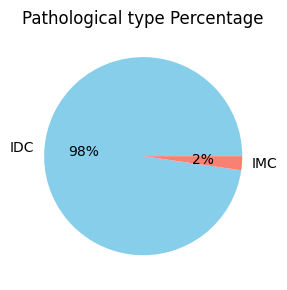

In [142]:
#Pathological Type analysis 

pathological_type_counts = df["pathological type"].value_counts()
print(pathological_type_counts)

#TABLE FOR Pathological Type ANALYSIS
Type_df = pathological_type_counts.reset_index()
Type_df.columns = ["Pathological type", "Num. of pts"]

#PIE CHART FOR Pathological type ANALYSIS
plt.figure(figsize=(3, 3))
plt.pie(Type_df["Num. of pts"], labels=Type_df["Pathological type"], autopct="%0.0f%%", colors=["skyblue", "salmon"])
plt.title("Pathological type Percentage")
plt.tight_layout()
plt.show()


luminal B           11
luminal A           10
triple negative      5
HER2/new             4
Name: molecular type, dtype: int64


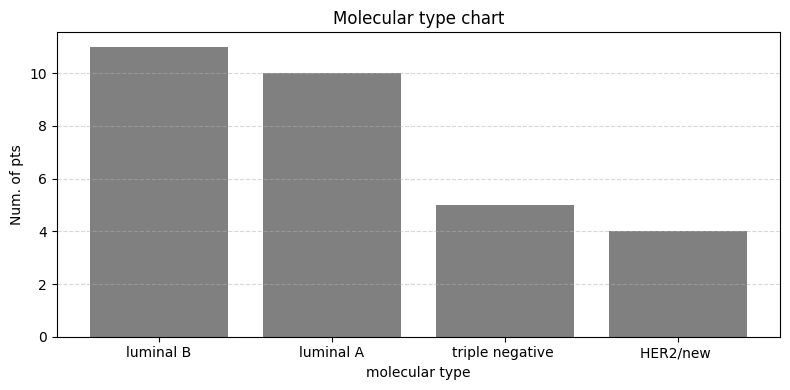

In [164]:
#molecular type Analysis

#Clean Data- Standardize tumor type labels by replacing inconsistent values
# e.g., replace "a" with "Luminal A" and "b" with "Luminal B"
df["molecular type"] = df["molecular type"].replace({
    "a": "luminal A",
    "A": "luminal A",
    "b": "luminal B",
    "B": "luminal B"
})


molecular_type_counts = df["molecular type"].value_counts()
print(molecular_type_counts)


#CONVERT DATA TO TABLE
molecular_type_df = molecular_type_counts.reset_index()
molecular_type_df.columns = ["molecular type", "Num. of pts"]

#COLUMN CHART FOR molecular type
plt.figure(figsize=(8, 4))
plt.bar(molecular_type_df["molecular type"], molecular_type_df["Num. of pts"], color="GREY")


#CREATE THE COLUMN CHART
plt.title("Molecular type chart")
plt.xlabel("molecular type")
plt.ylabel("Num. of pts")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


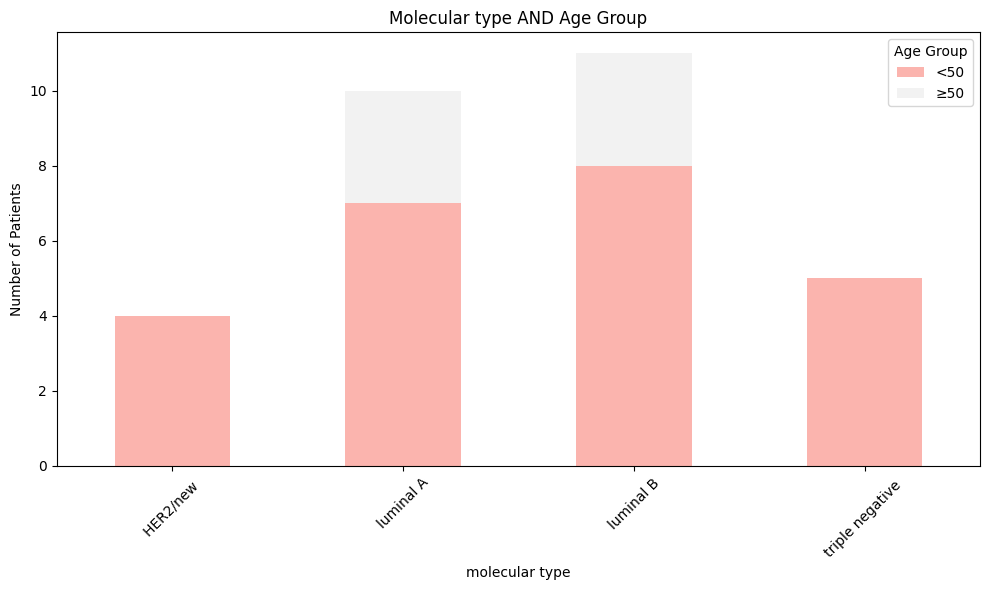

In [172]:
#Relation between Molecular types and Age groups

# Create age groups into two categories: <50 and ≥50
df['Age group'] = pd.cut(df['age'], bins=[0, 49, 100], labels=['<50', '≥50'])

# Create a pivot table
summary = df.pivot_table(index='molecular type', columns='Age group', aggfunc='size', fill_value=0)

# Create stacked bar chart
summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')

plt.title('Molecular type AND Age Group')
plt.xlabel('molecular type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



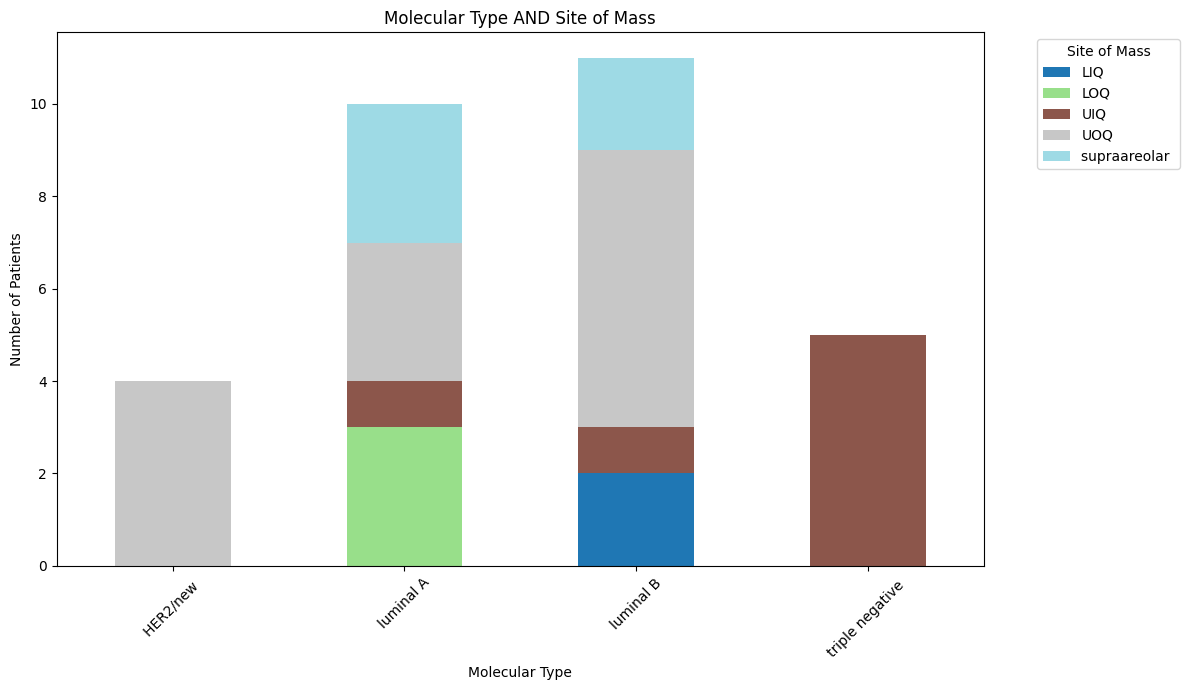

In [173]:
#Relation between Molecular types and Site of mass

# Create a pivot table
summary = df.pivot_table(index='molecular type', columns='site of mass', aggfunc='size', fill_value=0)

# Create stacked bar chart
ax = summary.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Molecular Type AND Site of Mass')
plt.xlabel('Molecular Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Site of Mass', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()
